In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

121
0.6873861115875889
-0.4132660677045259 2.049282098459019
129
1.155698356306725
0.8397496002610102 1.215099137387819


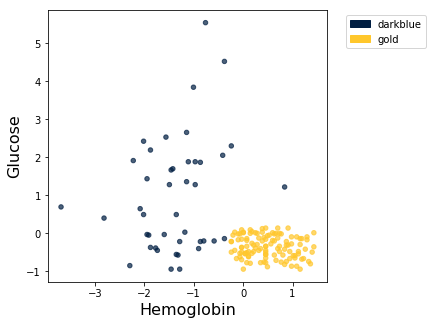

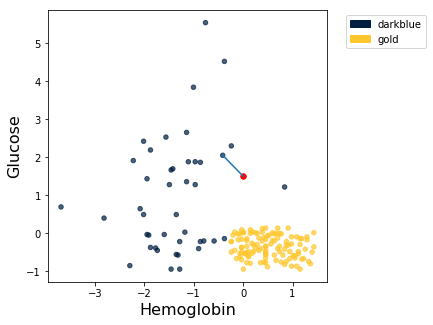

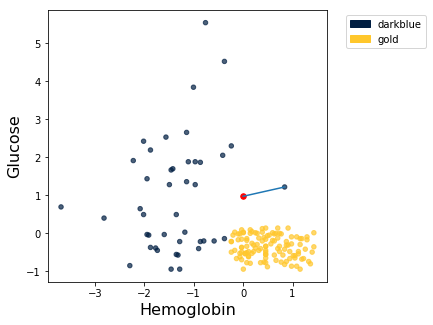

In [2]:
# 17.1 Nearest Neighbors
ckd = Table().read_table('ckd.csv')
ckd
ckd.column('Hemoglobin')

def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Blood Glucose Random')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class'),
)

color_table = Table().with_columns(
    'Class', [1, 0],
    'Color', ['darkblue', 'gold'],
)
ckd = ckd.join('Class', color_table)
ckd
ckd.scatter('Hemoglobin', 'Glucose', colors='Color')

def show_closet(point):
    distances = ( (ckd.column('Hemoglobin') - point[0]) ** 2 + (ckd.column('Glucose') - point[1]) ** 2 ) ** 0.5
    ckd_1 = ckd.with_column('Distances', distances)
    
    where_rtn = np.where(distances == np.min(distances))
    closet_index = where_rtn[0][0]
    print(closet_index)
    print(distances[121])
    x = ckd.row(closet_index).item(1)
    y = ckd.row(closet_index).item(2)
    print(x, y)
    ckd.scatter('Hemoglobin', 'Glucose', colors='Color')
    plt.scatter(point[0], point[1], s=30, color='red')
    plt.plot([x, point[0]], [y, point[1]])

show_closet([0, 1.5])
show_closet([0, 0.97])

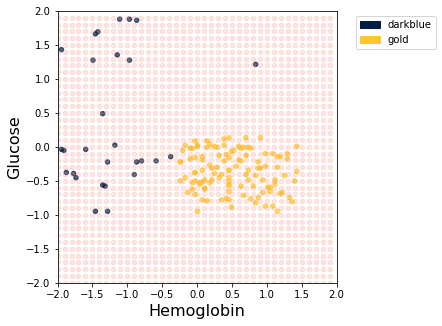

In [3]:
# 17.1 Decision Boundary

ckd.scatter('Hemoglobin', 'Glucose', colors='Color')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

bg_x = np.arange(-2, 2, 0.1)
bg_y = np.arange(-2, 2, 0.1)
bg_x, bg_y = np.mgrid[-2:2:0.1, -2:2:0.1]
plt.scatter(bg_x, bg_y, s=20, c='salmon', alpha=0.2)

Text(0.5,0,'WaveletCurt')

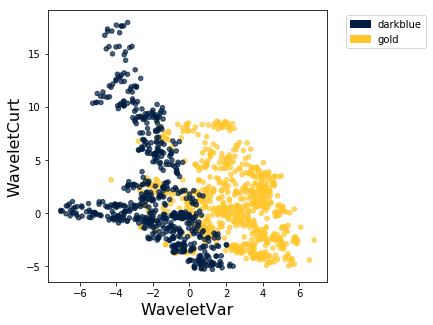

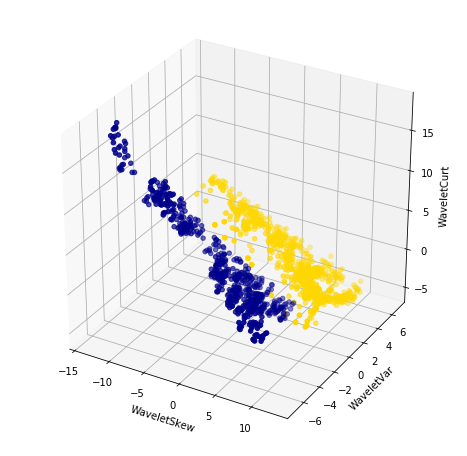

In [4]:
# 17.4 Implementing the Classifier
banknotes = Table.read_table('banknote.csv')
banknotes

color_table = Table().with_columns(
    'Class', [1, 0],
    'Color', ['darkblue', 'gold'],
)
color_table
banknotes = banknotes.join('Class', color_table)
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Color')

ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(
    banknotes.column('WaveletSkew'), 
    banknotes.column('WaveletVar'), 
    banknotes.column('WaveletCurt'), 
    c=banknotes.column('Color')
)
ax.set_xlabel('WaveletSkew')
ax.set_ylabel('WaveletVar')
ax.set_zlabel('WaveletCurt')

0

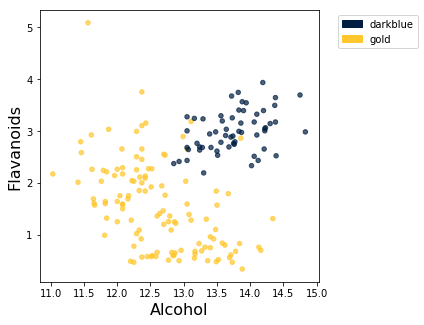

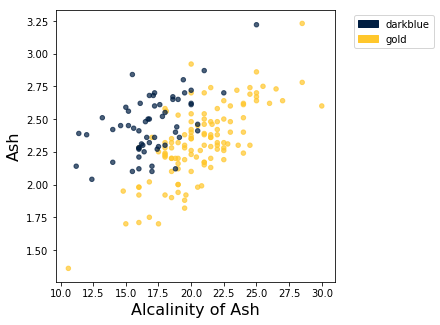

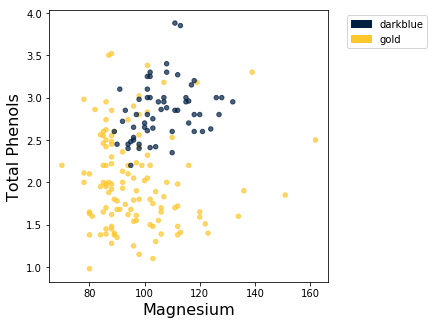

In [5]:
# 17.4 Wine

wine = Table.read_table('wine.csv')
wine.group('Class')

def distance(point_a, point_b):
    return np.sqrt(np.sum((point_a - point_b) ** 2))

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
wine = wine.with_column('Class', wine.apply(is_one, 'Class'))
wine.group('Class')
wine_attributes = wine.drop('Class')
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(177)))

wine_with_colors = wine.join('Class', color_table)
wine_with_colors.scatter('Alcohol', 'Flavanoids', colors='Color')
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', colors='Color')
wine_with_colors.scatter('Magnesium', 'Total Phenols', colors='Color')

def closet(training, point, k):
    def calculate_distance(point_a):
        return np.sqrt(np.sum((np.array(point_a) - point) ** 2))
    
    training = training.with_column(
        'Distance', training.drop('Class').apply(calculate_distance)
    )
    return training.sort('Distance').take[:k]

def majority(closet_k):
    zero_count = closet_k.where('Class', are.equal_to(0)).num_rows
    one_count  = closet_k.where('Class', are.equal_to(1)).num_rows
    if one_count > zero_count:
        return 1
    else:
        return 0
    
def classify(training, point, k):
    closet_k = closet(training, point, 5)
    return majority(closet_k)

special_wine = wine.drop('Class').row(0)
classify(wine, special_wine, 5)

special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0.9635854341736695

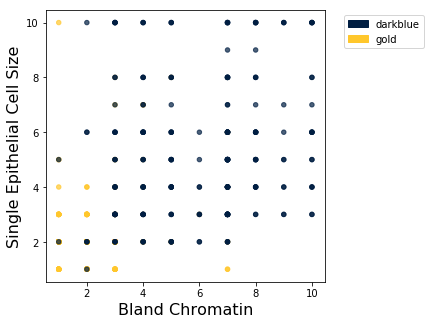

In [6]:
# 17.5 The Accuracy of the Classifier

def data_split(data, n):
    data = data.sample(with_replacement=False)
    return data.take[:n], data.take[n:]

train_wine, test_wine = data_split(wine, 89)

def evaluate_accuracy(train, test, k):
    def classify_test(test_point):
        return classify(train, test_point, k)
    
    c = test.drop('Class').apply(classify_test)
    error_count = np.count_nonzero(c - np.array(test.column('Class')))
    return 1 - error_count / test.num_rows

evaluate_accuracy(train_wine, test_wine, 5)


# Breast Cancer Diagnosis
patients = Table.read_table('breast-cancer-wisconsin.csv').drop('ID')
patients = patients.with_column(
    'Class', patients.apply(lambda x: np.round(x/4), 'Class')
)
patients

color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
patients_with_colors = patients.join('Class', color_table)
patients_with_colors.scatter('Bland Chromatin', 'Single Epithelial Cell Size', colors='Color')
train_patients, test_patients = data_split(patients, 342)
evaluate_accuracy(train_patients, test_patients, 5)